In [19]:
using HDF5
using Gadfly
using Colors

include("solution1.jl");

# 1D conditional GRF simulation

In [2]:
x1d_obs = h5read("../data_set1.h5", "x1d_obs");
fx1d_obs   = h5read("../data_set1.h5", "fx1d_obs");

In [3]:
nx = 200;
nsim = 3;
set_default_plot_size(24cm, 12cm)

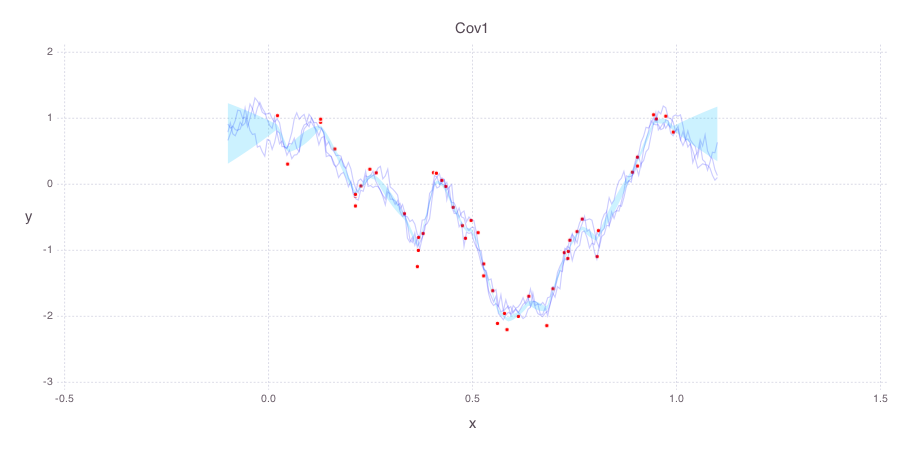

In [4]:
srand(618)
plot1d(Cov1(), nx, x1d_obs, fx1d_obs, nsim)

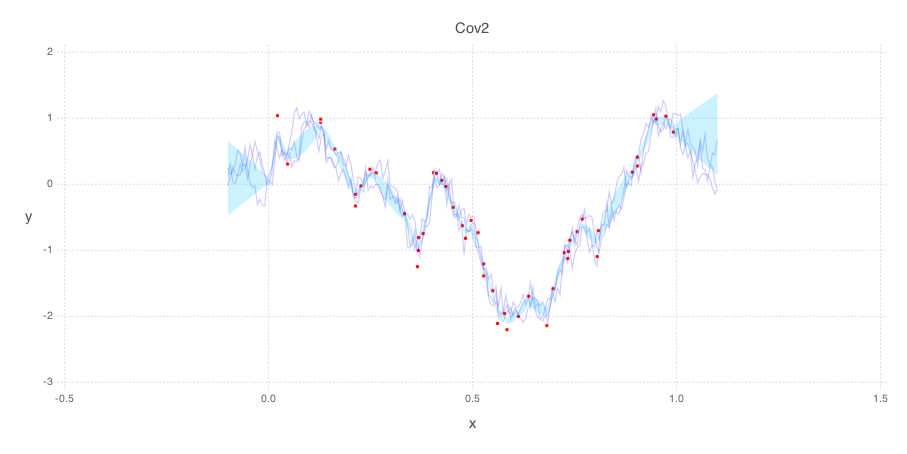

In [5]:
srand(618)
plot1d(Cov2(), nx, x1d_obs, fx1d_obs, nsim)

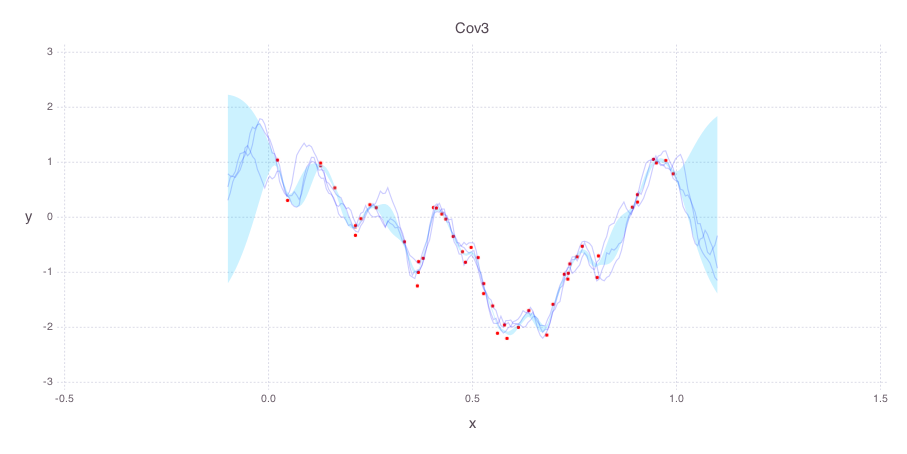

In [6]:
srand(618)
plot1d(Cov3(), nx, x1d_obs, fx1d_obs, nsim)

# 2D conditional GRF simulation

In [7]:
x2d_obs = h5read("../data_set2.h5", "x2d_obs");
fx2d_obs = h5read("../data_set2.h5", "fx2d_obs");

In [8]:
mesh_side = 100;

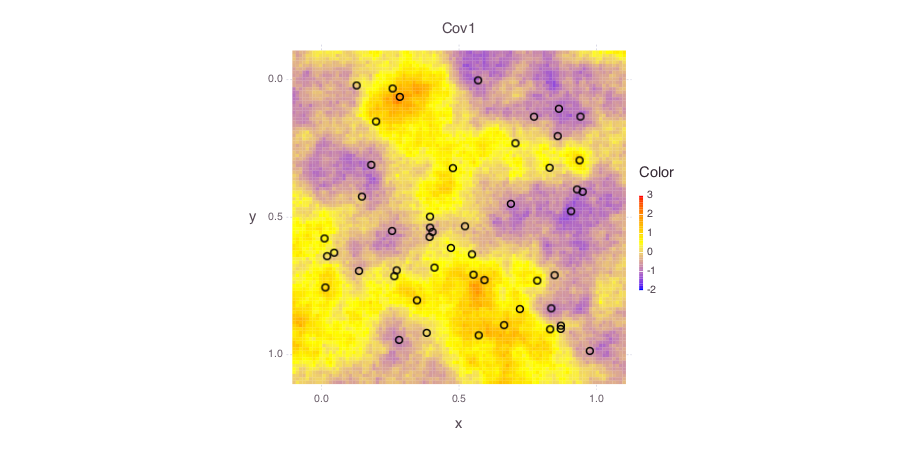

In [12]:
spyplot(Cov1(), mesh_side, x2d_obs, fx2d_obs)

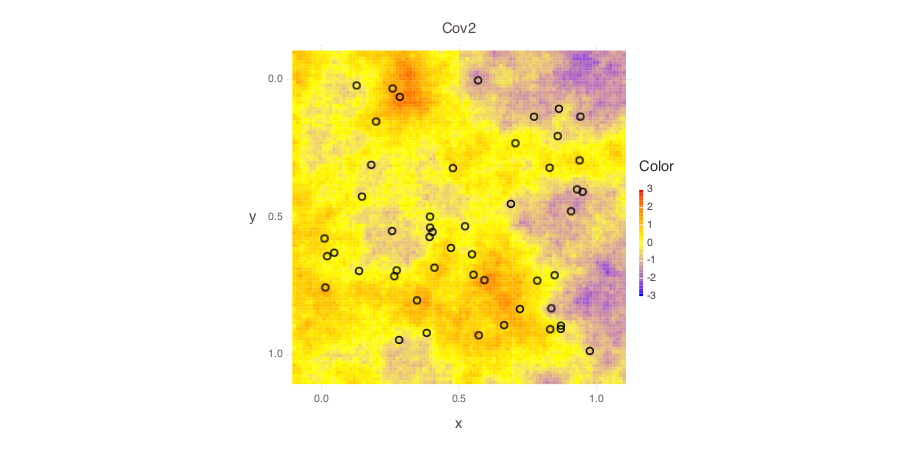

In [13]:
spyplot(Cov2(), mesh_side, x2d_obs, fx2d_obs)

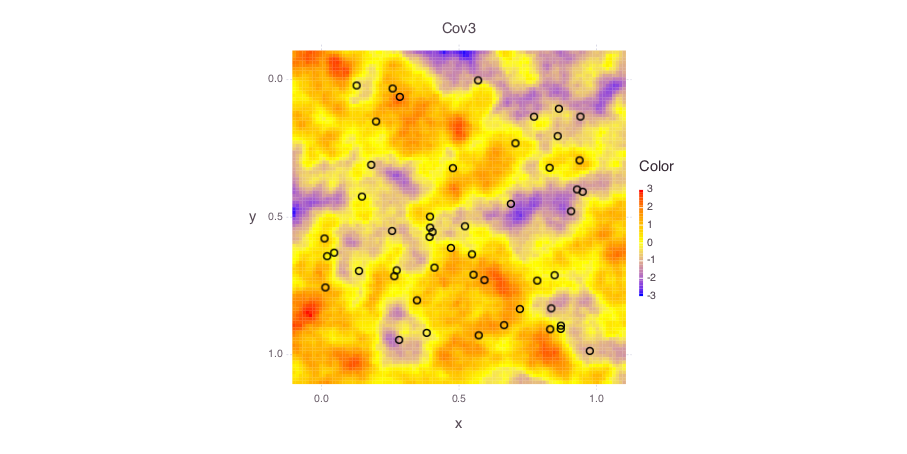

In [14]:
spyplot(Cov3(), mesh_side, x2d_obs, fx2d_obs)

# Loglikelihood of 1D GRF

In [51]:
Σ_1d = calculateΣ([Cov1(), Cov2(), Cov3()], x1d_obs);
logl_1d = loglikelihood(Σ_1d, fx1d_obs);
log1max = findmax(logl_1d);

@printf "%20s %10s %10s %10s\n" "1D" "cov1" "cov2" "cov3"
@printf "%20s %10.2f %10.2f %10.2f\n" "loglikelihood" logl_1d...
@printf "\nThe maximum likelihood estimation is cov%d.\n" log1max[2]

                  1D       cov1       cov2       cov3
       loglikelihood     -29.71     -25.85     -15.66

The maximum likelihood estimation is cov3.


# Loglikelihood of 2D GRF

In [52]:
Σ_2d = calculateΣ([Cov1(), Cov2(), Cov3()], x2d_obs);
logl_2d = loglikelihood(Σ_2d, fx2d_obs)
log2max = findmax(logl_2d);

@printf "%20s %10s %10s %10s\n" "2D" "cov1" "cov2" "cov3"
@printf "%20s %10.2f %10.2f %10.2f\n" "loglikelihood" logl_2d...
@printf "\nThe maximum likelihood estimation is cov%d.\n" log2max[2]

                  2D       cov1       cov2       cov3
       loglikelihood    -113.71     -87.50     -56.68

The maximum likelihood estimation is cov3.
